In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df=pd.read_excel('final_feat.xlsx')

In [216]:
df.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Created Date,Location Zip_x,Income_x,Year Month,Completed Jobs,Income_y,Lead Calls,Canceled Jobs_x,Future Scheduled Jobs,Location Zip_y,tech_count,Avg_job_per_day,county_name,TMAX,TMIN,Total Leads,Total Jobs,Avg Service,Avg Install,Canceled Jobs_y,Turn over %,Canceled %,Avg Sales,bookedjob,totalcalls,Booking rate
0,Thursday,3181.56,13361,156,0.0117,20.39,26.77,0.0486,118.86,0.5337,0.2676,0.1987,2020-01-02,90049,137581.58,2020 January,57,23933.54,60,8.0,63,90049,59,1,Los Angeles,65,51,10,101,143.417833,3224.412750,8,9.900990,7.920792,3617.444828,49,155,31.612903
1,Friday,2684.67,16841,160,0.0095,16.78,21.00,0.0299,127.84,0.5477,0.3122,0.1401,2020-01-03,92262,43204.73,2020 January,77,65232.03,64,7.0,81,92262,40,2,Riverside,71,44,9,89,75.515208,965.365854,7,10.112360,7.865169,1781.345385,56,176,31.818182
2,Saturday,1338.36,30788,142,0.0046,9.43,11.00,0.0186,121.67,0.5297,0.3158,0.1545,2020-01-04,92606,14709.40,2020 January,55,26195.32,58,4.0,61,92606,21,3,Orange,69,56,3,31,110.019048,1377.666667,4,9.677419,12.903226,459.248750,30,92,32.608696
3,Sunday,1192.31,12865,108,0.0084,11.04,5.00,0.0130,238.46,0.5741,0.3349,0.0910,2020-01-05,90638,3725.40,2020 January,6,264.00,32,1.0,6,90638,9,1,Los Angeles,69,52,2,15,67.914286,406.250000,1,13.333333,6.666667,846.000000,11,52,21.153846
4,Monday,2383.17,49514,188,0.0038,12.68,22.00,0.0566,108.33,0.6027,0.3596,0.0377,2020-01-06,90045,74598.75,2020 January,73,48506.16,62,5.0,82,90045,60,2,Los Angeles,77,60,8,91,78.753750,1646.943488,5,8.791209,5.494505,1820.060789,54,159,33.962264


In [217]:
df.columns

Index(['Day of week', 'Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC',
       'Conversions', 'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       'Search Lost IS (rank)', 'Search Lost IS (budget)', 'Created Date',
       'Location Zip_x', 'Income_x', 'Year Month', 'Completed Jobs',
       'Income_y', 'Lead Calls', 'Canceled Jobs_x', 'Future Scheduled Jobs',
       'Location Zip_y', 'tech_count', 'Avg_job_per_day', 'county_name',
       'TMAX', 'TMIN', 'Total Leads', 'Total Jobs ', 'Avg Service',
       'Avg Install', 'Canceled Jobs_y', 'Turn over %', 'Canceled %',
       'Avg Sales', 'bookedjob', 'totalcalls', 'Booking rate'],
      dtype='object')

In [218]:
df.shape

(350, 38)

In [219]:
df1=df[['Completed Jobs','tech_count','TMAX','Avg Sales','Income_y']]
    

In [220]:
df1=df1.drop_duplicates(ignore_index=True)

In [221]:
df1.shape

(344, 5)

In [222]:
df1.head()

,Completed Jobs,tech_count,TMAX,Avg Sales,Income_y
0,57,59,65,3617.444828,23933.54
1,77,40,71,1781.345385,65232.03
2,55,21,69,459.248750,26195.32
3,6,9,69,846.000000,264.00
4,73,60,77,1820.060789,48506.16


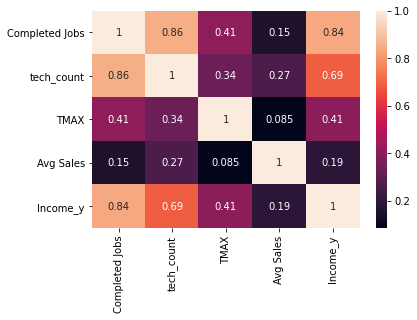

In [223]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [224]:
76**3*1.7543

770095.5967999999

In [225]:
df1.head()

,Completed Jobs,tech_count,TMAX,Avg Sales,Income_y
0,57,59,65,3617.444828,23933.54
1,77,40,71,1781.345385,65232.03
2,55,21,69,459.248750,26195.32
3,6,9,69,846.000000,264.00
4,73,60,77,1820.060789,48506.16


In [227]:

df1['f1']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
df1['f2']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
df1['f3']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

In [228]:
df1.columns

Index(['Completed Jobs', 'tech_count', 'TMAX', 'Avg Sales', 'Income_y', 'f1',
       'f2', 'f3'],
      dtype='object')

In [307]:
df1=df1[[ 'Income_y', 'f1',
       'f2', 'f3']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


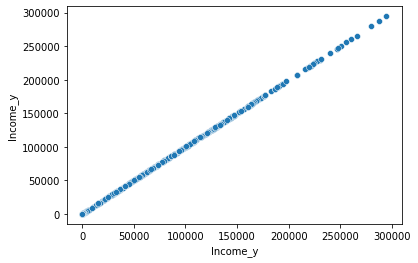

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


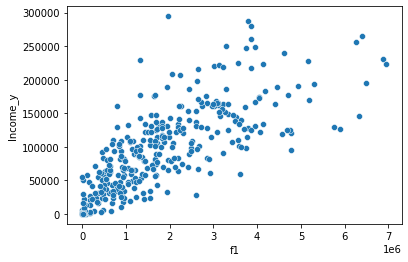

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


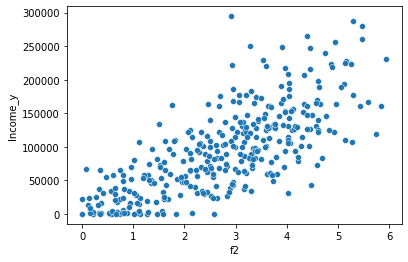

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


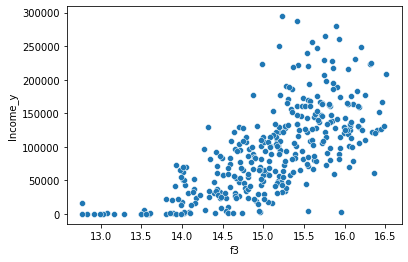

In [308]:
for i in df1.columns:
    sns.scatterplot(df1[i],df1['Income_y'])
    plt.show()

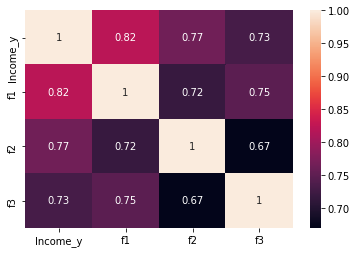

In [309]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [310]:
train=df1[0:300]
test=df1[300:]

In [311]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [312]:
X.head()

,f1,f2,f3
0,1.556733e+06,0.131311,14.544687
1,1.203606e+06,2.450409,14.959942
2,1.873234e+05,2.833623,14.705986
3,1.243361e+04,0.550510,13.598199
4,1.135194e+06,0.798037,15.176646


In [313]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler




In [314]:
scaler=MinMaxScaler()

In [315]:
X=scaler.fit_transform(X)

In [316]:
X

array([[2.23795951e-01, 2.20829826e-02, 4.73072826e-01],
       [1.73022215e-01, 4.12091995e-01, 5.84140126e-01],
       [2.68981272e-02, 4.76538095e-01, 5.16215019e-01],
       [1.75195363e-03, 9.25808157e-02, 2.19917742e-01],
       [1.63185820e-01, 1.34208074e-01, 6.42101365e-01],
       [9.79095648e-02, 1.57620557e-01, 6.22399059e-01],
       [6.38497802e-02, 3.83452317e-01, 4.38265291e-01],
       [1.19089949e-03, 2.48015810e-02, 2.02096360e-01],
       [1.76089420e-01, 4.62088323e-02, 4.17332741e-01],
       [6.82973037e-02, 5.66532140e-01, 4.58810964e-01],
       [1.26083832e-01, 3.28281605e-01, 4.32061711e-01],
       [8.75498086e-02, 3.77118772e-01, 4.33121045e-01],
       [2.24273874e-02, 4.95766864e-01, 5.15014388e-01],
       [8.78655484e-05, 1.23110987e-01, 1.44487659e-02],
       [1.10188487e-01, 9.52091853e-02, 4.14878840e-01],
       [6.38514317e-02, 4.41945161e-01, 3.72114933e-01],
       [9.55142233e-02, 2.65968048e-01, 4.52721028e-01],
       [1.51573833e-01, 3.34086

In [317]:

y=y.values
y=y.reshape(-1,1)

In [318]:

y=scaler.fit_transform(y)

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras.models import Sequential


In [333]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim =3))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam', loss='MeanSquaredError', metrics = ['MeanSquaredError'])


In [334]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test,y_test))


Epoch 1/100
8/8 [==============================] - 0s 24ms/step - loss: 0.4095 - mean_squared_error: 0.4095 - val_loss: 0.3591 - val_mean_squared_error: 0.3591
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3229 - mean_squared_error: 0.3229 - val_loss: 0.2476 - val_mean_squared_error: 0.2476
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.1635 - val_mean_squared_error: 0.1635
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1416 - mean_squared_error: 0.1416 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0672 - val_mean_squared_error: 0.0672
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 7/100
8/8 [============================

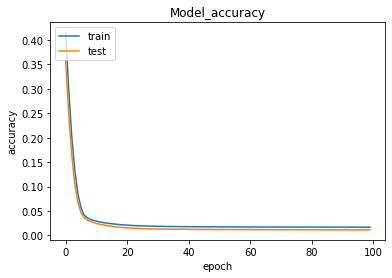

In [335]:
# Accuracy plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

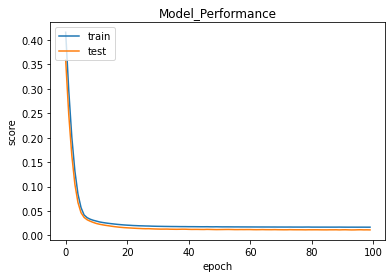

In [336]:
# Accuracy plot 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model_Performance')
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [337]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [338]:
X_.isnull().sum()

f1    0
f2    0
f3    0
dtype: int64

In [339]:


X_=scaler.fit_transform(X_)


In [340]:
y_pred_1 = model.predict(X_test)

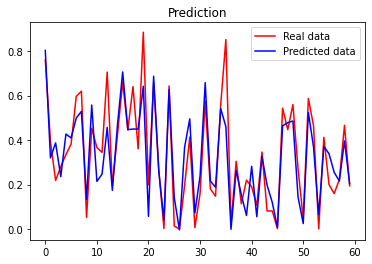

In [341]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [342]:
y_pred_2=model.predict(X_)

In [343]:
y_=y_.values
y_=y_.reshape(-1,1)

In [344]:
y_=scaler.fit_transform(y_)

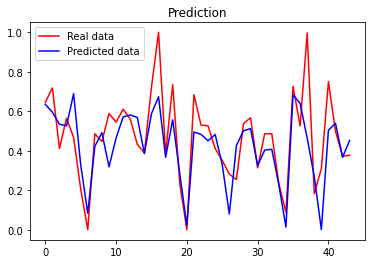

In [345]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [346]:
y_pred_2=scaler.inverse_transform(y_pred_2)

In [347]:
y_pred_2

array([[112671.43   ],
       [105690.125  ],
       [ 94909.25   ],
       [ 93473.305  ],
       [122322.15   ],
       [ 58535.605  ],
       [ 14991.759  ],
       [ 75173.445  ],
       [ 87288.69   ],
       [ 56669.188  ],
       [ 82513.97   ],
       [101427.17   ],
       [103229.73   ],
       [101006.3    ],
       [ 68548.5    ],
       [104312.055  ],
       [119559.81   ],
       [ 65216.27   ],
       [ 98865.92   ],
       [ 50411.324  ],
       [  3990.7473 ],
       [ 87911.805  ],
       [ 85770.055  ],
       [ 80045.71   ],
       [ 85722.15   ],
       [ 58525.22   ],
       [ 14393.476  ],
       [ 75774.17   ],
       [ 89064.03   ],
       [ 90920.53   ],
       [ 57919.508  ],
       [ 71731.87   ],
       [ 72443.164  ],
       [ 40406.85   ],
       [  2626.829  ],
       [121331.71   ],
       [113649.3    ],
       [ 82484.85   ],
       [ 47971.684  ],
       [   385.10013],
       [ 89499.74   ],
       [ 95734.15   ],
       [ 65204.     ],
       [ 80

In [348]:
y_=scaler.inverse_transform(y_)

In [349]:
y_

array([[1.1453421e+05],
       [1.2741210e+05],
       [7.3107940e+04],
       [1.0033570e+05],
       [8.2920440e+04],
       [3.6992000e+04],
       [3.2600000e+02],
       [8.6287170e+04],
       [7.9380380e+04],
       [1.0450901e+05],
       [9.6828960e+04],
       [1.0832711e+05],
       [9.9625260e+04],
       [7.6878350e+04],
       [6.9089170e+04],
       [1.2821029e+05],
       [1.7741042e+05],
       [6.8424710e+04],
       [1.3040640e+05],
       [4.1651850e+04],
       [1.0295000e+02],
       [1.2132892e+05],
       [9.4156550e+04],
       [9.3428490e+04],
       [7.3106960e+04],
       [6.2484030e+04],
       [5.0088000e+04],
       [4.5289920e+04],
       [9.5437440e+04],
       [1.0067486e+05],
       [5.5735080e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [4.1343950e+04],
       [1.5788000e+04],
       [1.2898555e+05],
       [9.3402160e+04],
       [1.7674702e+05],
       [3.2502400e+04],
       [5.5111850e+04],
       [1.3304285e+05],
       [8.853889

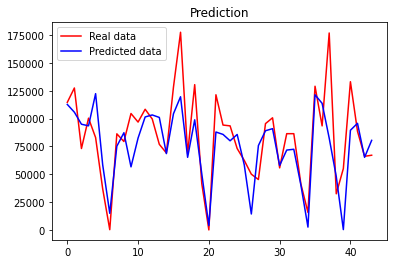

In [350]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [351]:
from sklearn.metrics import mean_squared_error

In [352]:
from sklearn.metrics import mean_absolute_error

In [353]:
mean_absolute_error(y_,y_pred_2)

18857.838076144133

In [354]:
np.sqrt(mean_squared_error(y_,y_pred_2))

26436.86650564339

In [355]:
np.sqrt(mean_squared_error(y_test,y_pred_1))

0.1056473676049133

In [356]:
from keras.models import load_model

In [357]:
model.save('forecast_2.h5')

In [358]:
loading_1=load_model('forecast_2.h5')

In [359]:
X_

array([[0.68859809, 0.79102319, 0.67214285],
       [0.67349766, 0.65554292, 0.83360014],
       [0.58687169, 0.59062548, 0.8288121 ],
       [0.75608042, 0.42007018, 0.69813427],
       [0.77286356, 0.87307248, 0.7108141 ],
       [0.17411476, 0.55667537, 0.68248803],
       [0.        , 0.28203263, 0.17393212],
       [0.33029152, 0.55609603, 0.95268991],
       [0.53204327, 0.54478914, 0.83271632],
       [0.3080608 , 0.37439677, 0.64453168],
       [0.96990221, 0.25411496, 0.50026381],
       [0.61357573, 0.7005986 , 0.66230563],
       [0.66266605, 0.64466888, 0.7735046 ],
       [0.63033454, 0.66675513, 0.6941767 ],
       [0.39077976, 0.45830615, 0.59791859],
       [0.85040239, 0.51060264, 0.6596549 ],
       [0.61362657, 1.        , 0.81285275],
       [0.35230876, 0.42454956, 0.76767721],
       [0.58335427, 0.64948778, 0.83277425],
       [0.15116572, 0.44422198, 0.68987735],
       [0.00674242, 0.04274377, 0.40589655],
       [0.73258651, 0.32986619, 0.82710157],
       [0.

In [360]:

p=loading_1.predict([[0.415307  , 0.36298704, 0.72769212]])


In [361]:
scaler.inverse_transform(p)

array([[65204.]], dtype=float32)

In [362]:
X_[11:20]

array([[0.61357573, 0.7005986 , 0.66230563],
       [0.66266605, 0.64466888, 0.7735046 ],
       [0.63033454, 0.66675513, 0.6941767 ],
       [0.39077976, 0.45830615, 0.59791859],
       [0.85040239, 0.51060264, 0.6596549 ],
       [0.61362657, 1.        , 0.81285275],
       [0.35230876, 0.42454956, 0.76767721],
       [0.58335427, 0.64948778, 0.83277425],
       [0.15116572, 0.44422198, 0.68987735]])

In [371]:
!pip install -U keras-tuner


Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.7/dist-packages (1.0.2)


In [372]:
from kerastuner.tuners import RandomSearch


In [373]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 40)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=1024,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='MeanSquaredError',
        metrics=['MeanSquaredError'])
    return model

In [374]:
from tensorflow import keras
from kerastuner import HyperModel


In [375]:
tuner = RandomSearch(build_model,objective='val_loss',max_trials=10,executions_per_trial=3)


In [376]:
tuner.search(X_train,y_train,epochs=100,validation_data= (X_test,y_test))


Trial 10 Complete [00h 00m 24s]
val_loss: 0.01078361707429091

Best val_loss So Far: 0.0105979156990846
Total elapsed time: 00h 27m 53s
INFO:tensorflow:Oracle triggered exit


In [377]:
tuner.results_summary()


Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 320
units_1: 192
learning_rate: 0.01
units_2: 96
units_3: 544
units_4: 960
units_5: 992
units_6: 896
units_7: 896
units_8: 352
units_9: 96
units_10: 64
units_11: 448
units_12: 64
units_13: 800
units_14: 768
units_15: 224
units_16: 256
units_17: 384
units_18: 800
units_19: 768
units_20: 736
units_21: 448
units_22: 576
units_23: 992
units_24: 192
units_25: 608
units_26: 128
units_27: 832
units_28: 864
units_29: 416
units_30: 224
units_31: 768
units_32: 544
units_33: 704
units_34: 256
units_35: 896
units_36: 832
units_37: 320
units_38: 704
units_39: 608
Score: 0.0105979156990846
Trial summary
Hyperparameters:
num_layers: 3
units_0: 672
units_1: 32
learning_rate: 0.0001
units_2: 480
units_3: 160
units_4: 352
units_5: 128
units_6: 864
units_7: 960
units_8: 960
units_9: 192
units_10: 608
units_11: 832
units_12: 384
units_13: 12

In [378]:
from keras.optimizers import Adam

In [379]:
X_


array([[0.68859809, 0.79102319, 0.67214285],
       [0.67349766, 0.65554292, 0.83360014],
       [0.58687169, 0.59062548, 0.8288121 ],
       [0.75608042, 0.42007018, 0.69813427],
       [0.77286356, 0.87307248, 0.7108141 ],
       [0.17411476, 0.55667537, 0.68248803],
       [0.        , 0.28203263, 0.17393212],
       [0.33029152, 0.55609603, 0.95268991],
       [0.53204327, 0.54478914, 0.83271632],
       [0.3080608 , 0.37439677, 0.64453168],
       [0.96990221, 0.25411496, 0.50026381],
       [0.61357573, 0.7005986 , 0.66230563],
       [0.66266605, 0.64466888, 0.7735046 ],
       [0.63033454, 0.66675513, 0.6941767 ],
       [0.39077976, 0.45830615, 0.59791859],
       [0.85040239, 0.51060264, 0.6596549 ],
       [0.61362657, 1.        , 0.81285275],
       [0.35230876, 0.42454956, 0.76767721],
       [0.58335427, 0.64948778, 0.83277425],
       [0.15116572, 0.44422198, 0.68987735],
       [0.00674242, 0.04274377, 0.40589655],
       [0.73258651, 0.32986619, 0.82710157],
       [0.

In [ ]:
num_layers: 3
units_0: 320
units_1: 192
learning_rate: 0.01
units_2: 96
units_3: 544
units_4: 960

In [382]:
model = Sequential()
model.add(Dense(320, activation = 'relu', input_dim =3))
model.add(Dense(192, activation = 'relu'))
model.add(Dense(96, activation = 'relu'))
model.add(Dense(544, activation = 'relu'))



model.add(Dense(1,activation = 'linear'))
model.compile(optimizer=Adam(lr=0.01), loss='MeanSquaredError', metrics = ['MeanSquaredError'])

In [383]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 29ms/step - loss: 0.2868 - mean_squared_error: 0.2868 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 7/100
8/8 [==========================

In [385]:
y_pr=model.predict(X_)

In [391]:
y_pred=scaler.inverse_transform(y_pr)

In [392]:
y_pred

array([[131990.77  ],
       [ 97783.17  ],
       [ 87773.67  ],
       [ 84399.766 ],
       [144534.25  ],
       [ 57914.05  ],
       [  4326.9404],
       [ 76288.45  ],
       [ 81414.48  ],
       [ 60514.793 ],
       [ 70592.66  ],
       [114743.98  ],
       [100619.76  ],
       [109787.3   ],
       [ 68525.31  ],
       [101645.88  ],
       [144873.98  ],
       [ 73696.75  ],
       [ 93834.12  ],
       [ 57641.094 ],
       [  5371.235 ],
       [ 74913.58  ],
       [ 85400.08  ],
       [ 89195.984 ],
       [ 90734.305 ],
       [ 73609.85  ],
       [  7270.7314],
       [ 75680.125 ],
       [ 87940.92  ],
       [ 82837.14  ],
       [ 71089.27  ],
       [ 65300.633 ],
       [ 76375.68  ],
       [ 33407.83  ],
       [   519.4209],
       [141593.38  ],
       [120012.89  ],
       [ 86447.805 ],
       [ 40556.29  ],
       [  4556.2686],
       [ 93142.78  ],
       [ 86269.2   ],
       [ 72844.54  ],
       [ 77716.92  ]], dtype=float32)

In [387]:
y_

array([[1.1453421e+05],
       [1.2741210e+05],
       [7.3107940e+04],
       [1.0033570e+05],
       [8.2920440e+04],
       [3.6992000e+04],
       [3.2600000e+02],
       [8.6287170e+04],
       [7.9380380e+04],
       [1.0450901e+05],
       [9.6828960e+04],
       [1.0832711e+05],
       [9.9625260e+04],
       [7.6878350e+04],
       [6.9089170e+04],
       [1.2821029e+05],
       [1.7741042e+05],
       [6.8424710e+04],
       [1.3040640e+05],
       [4.1651850e+04],
       [1.0295000e+02],
       [1.2132892e+05],
       [9.4156550e+04],
       [9.3428490e+04],
       [7.3106960e+04],
       [6.2484030e+04],
       [5.0088000e+04],
       [4.5289920e+04],
       [9.5437440e+04],
       [1.0067486e+05],
       [5.5735080e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [4.1343950e+04],
       [1.5788000e+04],
       [1.2898555e+05],
       [9.3402160e+04],
       [1.7674702e+05],
       [3.2502400e+04],
       [5.5111850e+04],
       [1.3304285e+05],
       [8.853889

In [388]:
model.save('forecast_nueral_fs.h5')

In [389]:
loading_3=load_model('forecast_nueral_fs.h5')

In [393]:
error=y_-y_pred

In [394]:
error

array([[-17456.555625  ],
       [ 29628.928125  ],
       [-14665.731875  ],
       [ 15935.934375  ],
       [-61613.81      ],
       [-20922.05078125],
       [ -4000.94042969],
       [  9998.716875  ],
       [ -2034.0965625 ],
       [ 43994.21703125],
       [ 26236.30375   ],
       [ -6416.8665625 ],
       [  -994.4978125 ],
       [-32908.946875  ],
       [   563.8575    ],
       [ 26564.4071875 ],
       [ 32536.435625  ],
       [ -5272.04      ],
       [ 36572.2828125 ],
       [-15989.24375   ],
       [ -5268.28486328],
       [ 46415.341875  ],
       [  8756.471875  ],
       [  4232.505625  ],
       [-17627.3446875 ],
       [-11125.8215625 ],
       [ 42817.26855469],
       [-30390.205     ],
       [  7496.518125  ],
       [ 17837.719375  ],
       [-15354.1934375 ],
       [ 21121.1671875 ],
       [ 10046.1203125 ],
       [  7936.121875  ],
       [ 15268.57910156],
       [-12607.825     ],
       [-26610.730625  ],
       [ 90299.2153125 ],
       [ -80

In [395]:
from sklearn import metrics 

np.sqrt(metrics.mean_squared_error(y_,y_pred))

27575.772899862193